# 01a01b Small Random Directed Graphs
> Random graphs for random test cases

In [ ]:
# default_exp graph_datasets
# hide
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

# Small Random Toy Directed Graphs

In this notebook, we will create several small and random toy directed graphs and visualize them directly. We will test any embedding and visualization methods on these datasets to check if the embeddings/visualization matches our intuition about the flow on the small directed graphs.

In [ ]:
# export
import warnings
import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_sparse import SparseTensor
from torch_geometric.utils import remove_self_loops


class SmallRandom(InMemoryDataset):
    def __init__(self, num_nodes=5, prob_edge=0.2, transform=None, pre_transform=None):
        super().__init__(".", transform, pre_transform)

        if num_nodes > 300:
            num_nodes = 300
            warnings.warn(
                f"Number of nodes is too large for SmallRandom dataset. Reset num_nodes =  {num_nodes}"
            )

        dense_adj = (torch.rand((num_nodes, num_nodes)) < prob_edge).int()
        sparse_adj = SparseTensor.from_dense(dense_adj)
        row, col, _ = sparse_adj.coo()
        edge_index, _ = remove_self_loops(torch.stack([row, col]))

        x = torch.eye(num_nodes, dtype=torch.float)
        data = Data(x=x, edge_index=edge_index)
        if self.pre_transform is not None:
            data = self.pre_transform(data)
        self.data, self.slices = self.collate([data])

Let try creating one such graph

In [ ]:
dataset = SmallRandom(num_nodes=10, prob_edge=0.3)
data = dataset[0] # there is only graph in this dataset

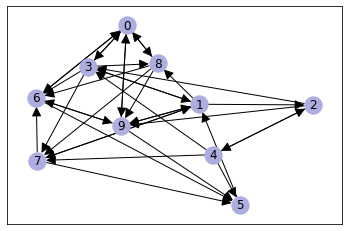

In [ ]:
# collapse
from FRED.graph_datasets import visualize_graph
visualize_graph(data)

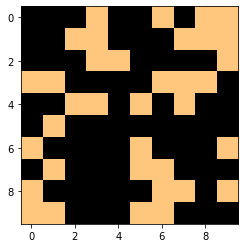

In [ ]:
# collapse
from FRED.graph_datasets import visualize_heatmap
visualize_heatmap(data.edge_index)

It is also possible to create source and sink nodes using the same `SourceSink` transformation to generate small directed graph with specific characteristic. We will try transforming the graph above into a big cluster of source and a smaller cluster of sinks

In [ ]:
from FRED.graph_datasets import SourceSink
pre_transform = SourceSink(prob_source=0.6, prob_sink=0.4, adv_prob=0.1, remove_prob=0)
dataset = SmallRandom(num_nodes=20, prob_edge=0.2, pre_transform=pre_transform)
data = dataset[0]

c:\Yale\sumry\FRED\FRED\graph_datasets.py:152: UserWarning: Data has no ground-truth labels
  warnings.warn("Data has no ground-truth labels")


In [ ]:
# collapse
visualize_graph(data)

NameError: name 'visualize_graph' is not defined

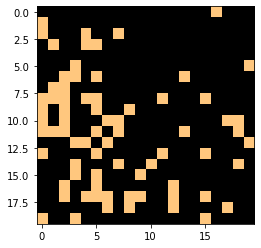

In [ ]:
# collapse
order_ind = torch.argsort(data.y[:,1])
visualize_heatmap(data.edge_index, order_ind)

From the heatmap alone we can clearly see 2 cluster of nodes, one acts as a source and one acts a sink.

## Specific Small Graph

We create a few extremely simple graphs that can be immediately understood with simple nodes-and-edges visualization, including `ChainGraph` and `CycleGraph`.

In [ ]:
# export
class ChainGraph(InMemoryDataset):
    def __init__(self, num_nodes=2, transform=None):
        super().__init__(".", transform)
        dense_adj = torch.diag(torch.ones(num_nodes-1), 1)
        sparse_adj = SparseTensor.from_dense(dense_adj)
        row, col, _ = sparse_adj.coo()
        edge_index, _ = remove_self_loops(torch.stack([row, col]))

        x = torch.eye(num_nodes, dtype=torch.float)
        data = Data(x=x, edge_index=edge_index)
        self.data, self.slices = self.collate([data])

In [ ]:
dataset = ChainGraph(num_nodes=5)
data = dataset[0]

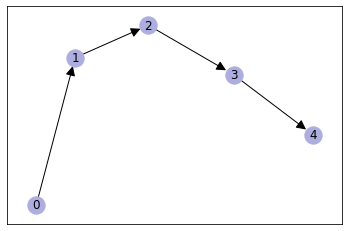

In [ ]:
# collapse
visualize_graph(data)

In [ ]:
# export
class HalfChainGraph(InMemoryDataset):
    def __init__(self, num_nodes=3, center=1, transform=None):
        super().__init__(".", transform)
        dense_adj = (
            torch.diag(torch.cat((torch.ones(center), torch.zeros(num_nodes-center-1))), 1)
            + torch.diag(torch.cat((torch.zeros(center), torch.ones(num_nodes-center-1))), -1)
        )
        sparse_adj = SparseTensor.from_dense(dense_adj)
        row, col, _ = sparse_adj.coo()
        edge_index, _ = remove_self_loops(torch.stack([row, col]))

        x = torch.eye(num_nodes, dtype=torch.float)
        data = Data(x=x, edge_index=edge_index)
        self.data, self.slices = self.collate([data])

In [ ]:
dataset = HalfChainGraph(num_nodes=6, center=2)
data = dataset[0]

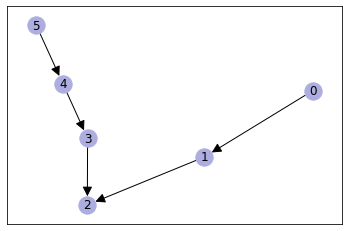

In [ ]:
# collapse
from FRED.graph_datasets import visualize_graph
visualize_graph(data)

In [ ]:
# export
class CycleGraph(InMemoryDataset):
    def __init__(self, num_nodes=3, transform=None):
        super().__init__(".", transform)
        dense_adj = torch.diag(torch.ones(num_nodes-1), 1)
        dense_adj[num_nodes-1,0] = 1
        sparse_adj = SparseTensor.from_dense(dense_adj)
        row, col, _ = sparse_adj.coo()
        edge_index, _ = remove_self_loops(torch.stack([row, col]))

        x = torch.eye(num_nodes, dtype=torch.float)
        data = Data(x=x, edge_index=edge_index)
        self.data, self.slices = self.collate([data])

In [ ]:
dataset = CycleGraph(num_nodes=8)
data = dataset[0]

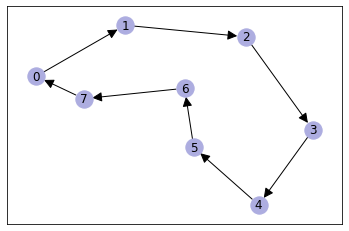

In [ ]:
# collapse
visualize_graph(data)

In [ ]:
# export
class HalfCycleGraph(InMemoryDataset):
    def __init__(self, num_nodes=3, center=0, transform=None):
        super().__init__(".", transform)
        dense_adj = torch.diag(torch.ones(num_nodes-1), 1)
        dense_adj[num_nodes-1,0] = 1
        dense_adj[(center+1)%num_nodes, center] = 1
        sparse_adj = SparseTensor.from_dense(dense_adj)
        row, col, _ = sparse_adj.coo()
        edge_index, _ = remove_self_loops(torch.stack([row, col]))

        x = torch.eye(num_nodes, dtype=torch.float)
        data = Data(x=x, edge_index=edge_index)
        self.data, self.slices = self.collate([data])

In [ ]:
dataset = HalfCycleGraph(num_nodes=3, center=0)
data = dataset[0]

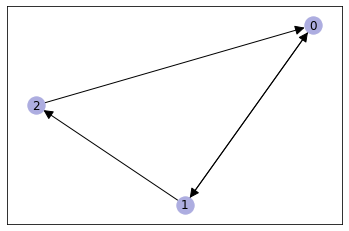

In [ ]:
# collapse
visualize_graph(data)